# Sección 4: Teorema del Valor Intermedio (TVI)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, lambdify, Eq, solve
from scipy.optimize import bisect

# Configuración general de gráficos
plt.style.use("seaborn-v0_8-darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)
plt.rcParams["font.size"] = 12

## 1. Teorema del Valor Intermedio (TVI)

**Definición Formal**:  
Sea $f$ una función continua en un intervalo cerrado $[a, b]$. Si $y_0$ es cualquier valor entre $f(a)$ y $f(b)$, entonces existe al menos un $c \in (a, b)$ tal que $f(c) = y_0$.

**Interpretación Gráfica**:  
Si una función continua pasa de un valor negativo a uno positivo (o viceversa) en un intervalo, debe cruzar el eje x al menos una vez en ese intervalo.

### Caso 1: TVI con Intervalo Dado

**Procedimiento**:
1. Verificar continuidad en $[a, b]$
2. Calcular $f(a)$ y $f(b)$
3. Comprobar cambio de signo
4. Aplicar TVI

#### Ejemplo del PDF (Intervalo $[-2, 5]$):

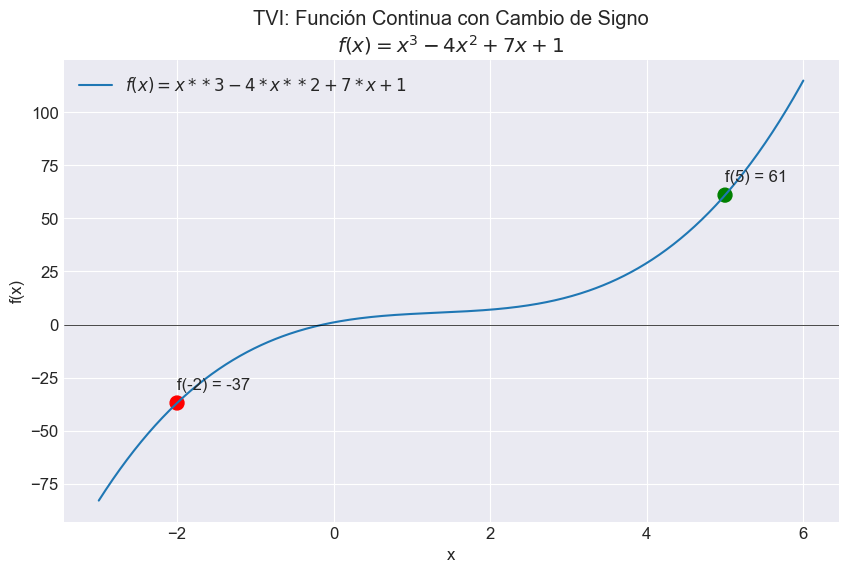

f(-2) = -37 (negativo)
f(5) = 61 (positivo)
→ Por TVI, existe al menos una raíz en [-2, 5]


In [2]:
x = symbols("x")
f1 = x**3 - 4 * x**2 + 7 * x + 1

# Convertir a función numérica
f1_num = lambdify(x, f1, "numpy")

# Puntos del intervalo
a, b = -2, 5
fa, fb = f1_num(a), f1_num(b)

# Gráfico
x_vals = np.linspace(a - 1, b + 1, 500)
plt.plot(x_vals, f1_num(x_vals), label=f"$f(x) = {str(f1)}$")
plt.axhline(0, color="black", linewidth=0.5)
plt.scatter([a, b], [fa, fb], color=["red", "green"], s=100)
plt.annotate(f"f({a}) = {fa}", (a, fa), textcoords="offset points", xytext=(0, 10))
plt.annotate(f"f({b}) = {fb}", (b, fb), textcoords="offset points", xytext=(0, 10))
plt.title("TVI: Función Continua con Cambio de Signo\n$f(x) = x^3 - 4x^2 + 7x + 1$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

print(f"f({a}) = {fa} (negativo)")
print(f"f({b}) = {fb} (positivo)")
print("→ Por TVI, existe al menos una raíz en [-2, 5]")

### Caso 2: TVI sin Intervalo Dado

**Estrategias**:
1. Analizar comportamiento de la función
2. Buscar valores con signos opuestos
3. Considerar propiedades especiales (trigonométricas, polinomiales)

#### Ejemplo del PDF: $f(x) = (x-1)^3 $

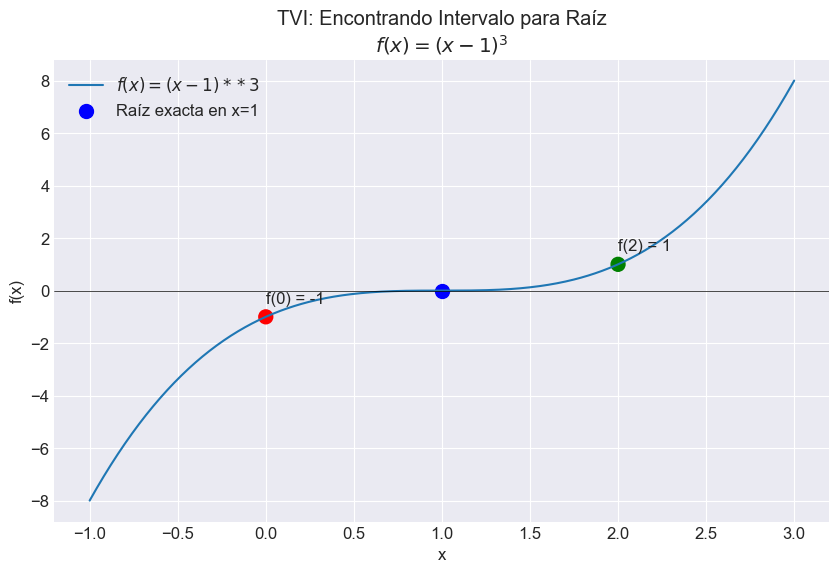

f(0) = -1 (negativo)
f(2) = 1 (positivo)
→ Por TVI, existe al menos una raíz en [0, 2]


In [3]:
f2 = (x - 1) ** 3
f2_num = lambdify(x, f2, "numpy")

# Buscamos un intervalo adecuado
a, b = 0, 2
fa, fb = f2_num(a), f2_num(b)

# Gráfico
x_vals = np.linspace(a - 1, b + 1, 500)
plt.plot(x_vals, f2_num(x_vals), label=f"$f(x) = {str(f2)}$")
plt.axhline(0, color="black", linewidth=0.5)
plt.scatter([a, b], [fa, fb], color=["red", "green"], s=100)
plt.scatter(1, 0, color="blue", s=100, label="Raíz exacta en x=1")
plt.annotate(f"f({a}) = {fa}", (a, fa), textcoords="offset points", xytext=(0, 10))
plt.annotate(f"f({b}) = {fb}", (b, fb), textcoords="offset points", xytext=(0, 10))
plt.title("TVI: Encontrando Intervalo para Raíz\n$f(x) = (x-1)^3$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()

print(f"f({a}) = {fa} (negativo)")
print(f"f({b}) = {fb} (positivo)")
print("→ Por TVI, existe al menos una raíz en [0, 2]")

## 2. Demostración Práctica con Bisección

Implementemos el método de bisección (basado en TVI) para encontrar una raíz aproximada:


Raíz aproximada en x ≈ -0.132494
Valor de f en la raíz: -6.14e-07


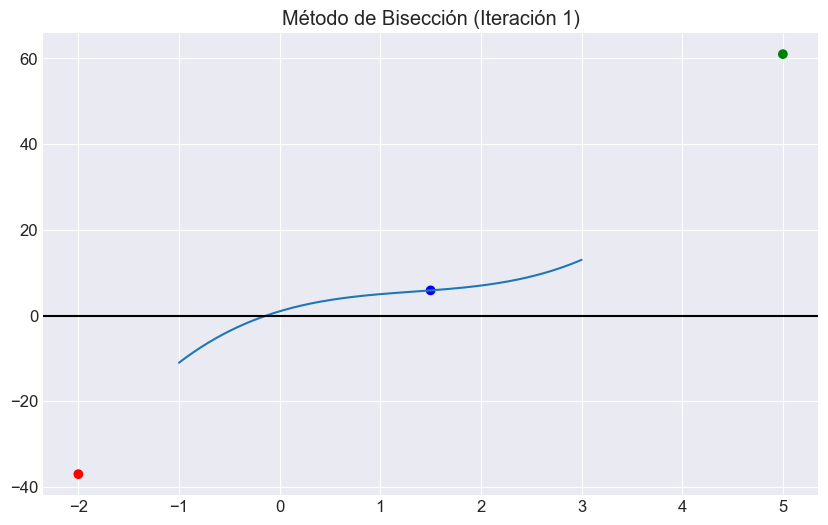

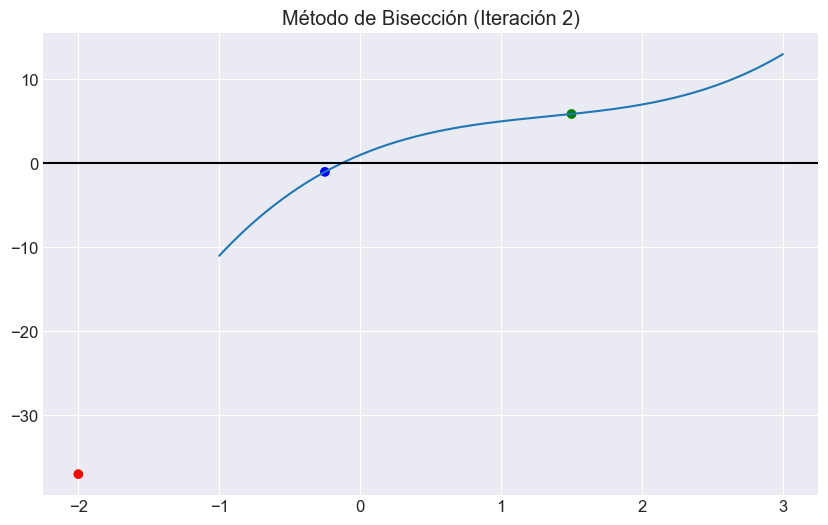

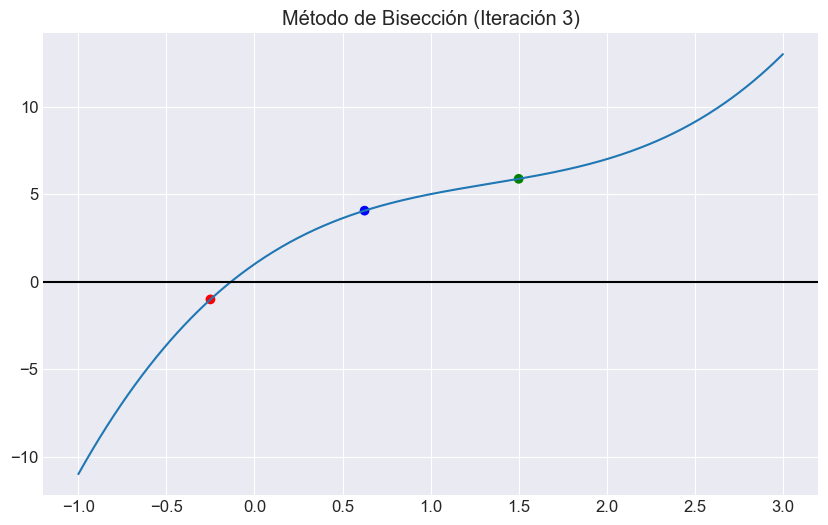

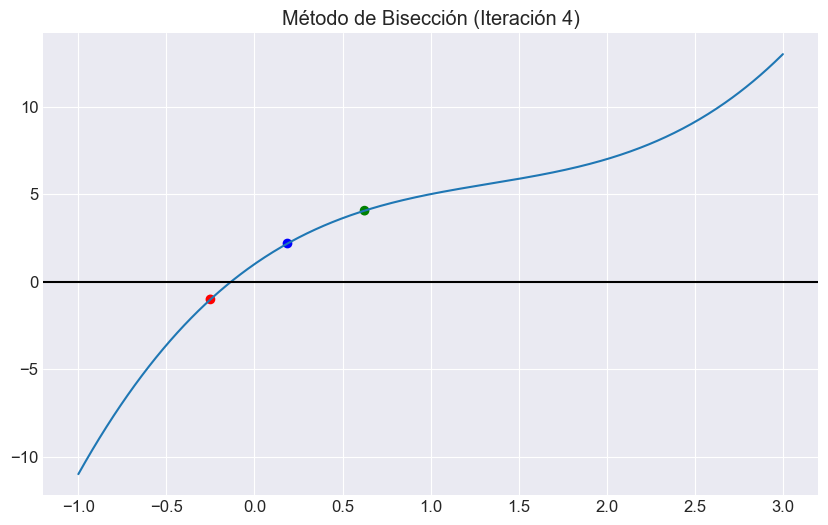

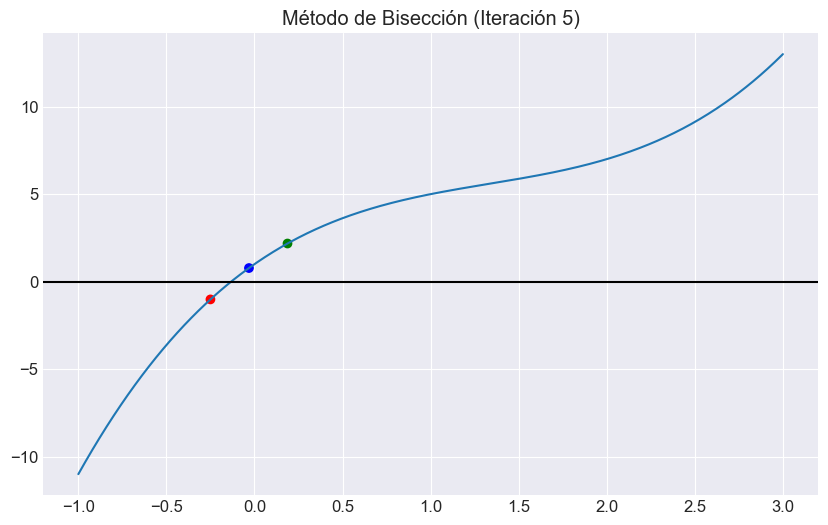

In [4]:
def aplicar_tvi(f, a, b, tol=1e-6, max_iter=100):
    if f(a) * f(b) > 0:
        raise ValueError("No hay cambio de signo en el intervalo")

    for i in range(max_iter):
        c = (a + b) / 2
        if abs(f(c)) < tol:
            return c
        if f(a) * f(c) < 0:
            b = c
        else:
            a = c
    return (a + b) / 2


# Aplicamos a nuestro primer ejemplo
raiz_aprox = aplicar_tvi(f1_num, -2, 5)
print(f"\nRaíz aproximada en x ≈ {raiz_aprox:.6f}")
print(f"Valor de f en la raíz: {f1_num(raiz_aprox):.2e}")

# Visualización del proceso
a, b = -2, 5
for _ in range(5):
    c = (a + b) / 2
    plt.plot(x_vals, f1_num(x_vals))
    plt.scatter(
        [a, b, c], [f1_num(a), f1_num(b), f1_num(c)], color=["red", "green", "blue"]
    )
    plt.axhline(0, color="black")
    plt.title(f"Método de Bisección (Iteración {_ + 1})")
    plt.show()
    if f1_num(a) * f1_num(c) < 0:
        b = c
    else:
        a = c

## 3. Aplicación a Funciones Trigonométricas

**Ejemplo Adicional**: Demostrar que $\cos(x) = x$ tiene solución en $[0, \pi/2]$.

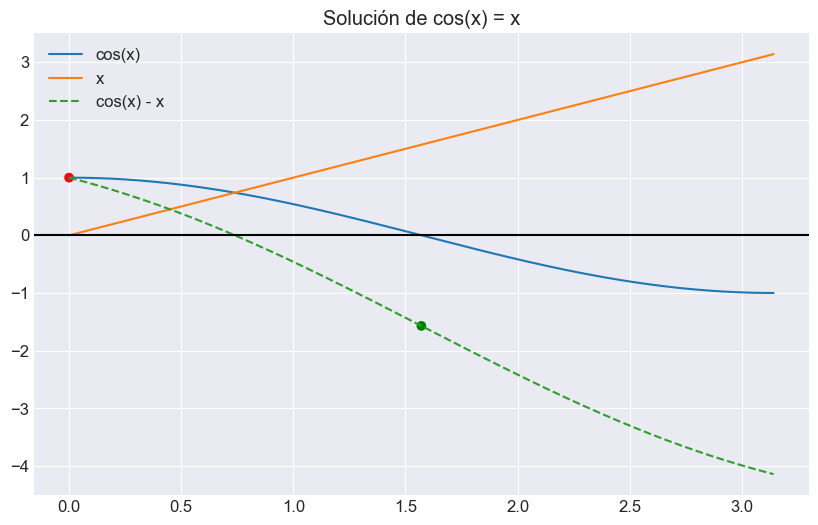

f(0) = 1.00 (positivo)
f(π/2) = -1.57 (negativo)
→ Existe solución para cos(x) = x en [0, π/2]


In [5]:
# Definimos la función y el intervalo para cos(x) = x
f3 = np.cos
a, b = 0, np.pi / 2

# Preparamos los valores de x
x_vals = np.linspace(0, np.pi, 500)

# Gráficas
plt.plot(x_vals, f3(x_vals), label="cos(x)")
plt.plot(x_vals, x_vals, label="x")
plt.plot(x_vals, f3(x_vals) - x_vals, label="cos(x) - x", linestyle="--")
# Ejes y puntos destacados
plt.axhline(0, color="black")
plt.scatter([a, b], [f3(a) - a, f3(b) - b], color=["red", "green"])
plt.title("Solución de cos(x) = x")
plt.legend()
plt.grid(True)
plt.show()

# Impresión de los valores
print(f"f(0) = {f3(a) - a:.2f} (positivo)")
print(f"f(π/2) = {f3(b) - b:.2f} (negativo)")
print("→ Existe solución para cos(x) = x en [0, π/2]")

## Resumen Teórico

| **Caso**               | **Procedimiento**                          | **Condiciones**                      |
|-------------------------|--------------------------------------------|---------------------------------------|
| TVI con intervalo       | 1. Verificar continuidad<br>2. Evaluar extremos<br>3. Comprobar cambio de signo | Función continua en $[a, b]$       |
| TVI sin intervalo       | 1. Analizar función<br>2. Probar valores<br>3. Encontrar intervalo adecuado | Función continua en algún $[a, b]$ |

**Limitaciones del TVI**:
- Solo prueba existencia, no unicidad
- No proporciona el valor exacto de la raíz
- Requiere continuidad en todo el intervalo